In [1]:
#! conda install -y -c conda-forge msprime
import allel
import msprime
import zarr
import numcodecs
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import statistics as stats

In [7]:
# define parameters + simulate some data

Ne = 1e6
Mu = 1e-8
sample_size = 50
n_sites = 10000
iterations = list(range(1, 500, 1))

# simulate the specified number of iterations/sites/samples

# collected all the pi samples
pi_list = list()

for iteration in iterations:
    tree_seq = msprime.simulate(sample_size=sample_size, Ne=Ne, 
                                length=n_sites, mutation_rate=Mu, random_seed = iteration)
    pi_obs = (tree_seq.pairwise_diversity()/n_sites)
    pi_list.append(pi_obs)
    



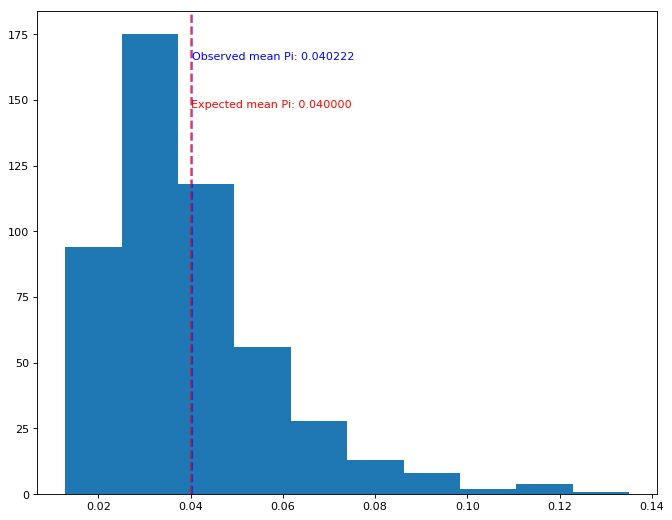

In [8]:
# plot the observed and expected (4Neu) values of pi

fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(x = pi_list)

mean_pi = stats.mean(pi_list)

plt.axvline(mean_pi, color='b', linestyle='dashed', linewidth=2, alpha=0.5)
plt.axvline(4*Ne*Mu, color='r', linestyle='dashed', linewidth=2, alpha=0.5)

# annotate the observed and expected values
_, max_ = plt.ylim()
plt.text(mean_pi, 
         max_ - max_/10, 
         'Observed mean Pi: {:.6f}'.format(mean_pi), color = 'b')

_, max_ = plt.ylim()
plt.text(4*Ne*Mu, 
         (max_ - max_/10) - max_/10 , 
         'Expected mean Pi: {:.6f}'.format(4*Ne*Mu), color = 'r')

plt.show()

In [29]:
tree_seq = msprime.simulate(sample_size=sample_size, Ne=Ne, 
                                length=n_sites, mutation_rate=Mu, random_seed = iteration)
pi_obs = (tree_seq.pairwise_diversity()/n_sites)

print(4*Ne*Mu);
print(pi_obs);


with open("data/msprime/test_vcf_var_only.vcf", "w") as vcf_file:
    tree_seq.write_vcf(vcf_file, ploidy=2)
    


0.04
0.048303673469387756


In [59]:
print("Before")
#print(tree_seq.tables.sites)

tree_seq = floor_sites(tree_seq)
tables = tree_seq.dump_tables()
new_sites = set(range(n_sites)) - set(tables.sites.position)
for pos in new_sites:
    tables.sites.add_row(position=pos, ancestral_state="0")
tables.sort()

print("After")
#print(tables.sites)

tree_seq = tables.tree_sequence()

with open("data/msprime/test_vcf_var_invar.vcf", "w") as vcf_file:
    tree_seq.write_vcf(vcf_file, ploidy=2)
    


Before
After


In [30]:
vcf_path = "data/msprime/ms_prime_test.vcf"
zarr_path = "data/msprime/ms_prime_test.zarr"

allel.vcf_to_zarr(vcf_path, zarr_path, group='1', fields='*', log=sys.stdout, overwrite=True)


[vcf_to_zarr] 10000 rows in 0.03s; chunk in 0.03s (312541 rows/s)
[vcf_to_zarr] all done (134318 rows/s)


In [31]:
# initialie the zarr array
callset = zarr.open_group(zarr_path, mode='r')
callset.tree(expand=True)

# positions to compute pi
pos = allel.SortedIndex(callset['1/variants/POS'])
pos
print(pos)

gt_zarr = callset['1/calldata/GT']
gt_zarr.info


loc_region = pos.locate_range(0, n_sites)
loc_region

gt= allel.GenotypeArray(gt_zarr[loc_region])
ac = gt.count_alleles()
type(ac)

allel.sequence_diversity(pos, ac, start=0, stop=n_sites)


[1, 2, 3, 4, 5, ..., 9996, 9997, 9998, 9999, 10000]


0.04829884358502925

In [32]:
gt

<GenotypeArray shape=(10000, 25, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/1 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [51]:
zarr_path = "data/msprime/test_vcf_var_invar.zarr"

# initialie the zarr array
callset = zarr.open_group(zarr_path, mode='r')
callset.tree(expand=True)

# positions to compute pi
pos = allel.SortedIndex(callset['1/variants/POS'])
pos
print(pos)

gt_zarr = callset['1/calldata/GT']
gt_zarr.info

loc_region = pos.locate_range(0, n_sites)
loc_region

gt= allel.GenotypeArray(gt_zarr[loc_region])
ac = gt.count_alleles()
type(ac)

allel.sequence_diversity(pos, ac, start=0, stop=n_sites)

[1, 2, 3, 4, 5, ..., 996, 997, 998, 999, 1000]


0.01979897653367041

In [57]:
vcf_path = "data/msprime/vcf_out.vcf"
zarr_path = "data/msprime/vcf_out.zarr"

allel.vcf_to_zarr(vcf_path, zarr_path, group='1', fields='*', log=sys.stdout, overwrite=True)

zarr_path = "data/msprime/vcf_out.zarr"

# initialie the zarr array
callset = zarr.open_group(zarr_path, mode='r')
callset.tree(expand=True)

# positions to compute pi
pos = allel.SortedIndex(callset['1/variants/POS'])
pos
print(pos)

gt_zarr = callset['1/calldata/GT']
gt_zarr.info

loc_region = pos.locate_range(0, n_sites)
loc_region

gt= allel.GenotypeArray(gt_zarr[loc_region])
ac = gt.count_alleles()
type(ac)

allel.sequence_diversity(pos, ac, start=0, stop=n_sites)

[vcf_to_zarr] 1000 rows in 0.01s; chunk in 0.01s (81434 rows/s)
[vcf_to_zarr] all done (18850 rows/s)
[1, 2, 3, 4, 5, ..., 996, 997, 998, 999, 1000]


0.15395069576887757